In [1]:
import pandas as pd

df_temp=pd.read_parquet('3base_model/3stacked_base_model_prediction.parquet')

In [2]:
df_temp.head()

,lgb_pred,xgb_pred,catboost_pred,y
0,1.0,1.0,1.0,1
1,1.0,1.0,1.0,1
2,1.0,1.0,1.0,1
3,1.0,1.0,1.0,1
4,1.0,1.0,1.0,1


In [3]:
!pip install catboost==1.2.7
# Install missing xgboost package
!pip install xgboost
!pip install lightgbm
!pip install xgboost==2.1.4
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 18.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 11.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 110.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 3.0.0
    Uninstalling xgboost-3.0.0:
      Successfully uninstalled xgboost-3.0.0

[notice] A new rele

In [4]:
# Import LightGBM and XGBoost
import lightgbm as lgb
import xgboost as xgb
import catboost
import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# LightGBM uses 'LGBMModel' for loading trained models
lgb_model = lgb.Booster(model_file='lightgbm/lightgbm_model.txt')

# Load XGBoost model
xgb_model = xgb.Booster()
xgb_model.load_model('xg_boost/xgboost_model.json')

catboost_model= catboost.CatBoostClassifier().load_model('catboost_info/best_model.cbm')

logistic_model = joblib.load('3base_model/3stacked_meta_model.pkl')

In [5]:
import pandas as pd

df = pd.read_parquet('/work/data.parquet')
df.head()

,Airline Code,Aircraft Registration,Operator,Type Code,Mode S,Serial Number,Age(years),FROM,TO,Arrival_Delayed,...,STD_UTC_day_of_year,STD_UTC_week_of_year,STD_UTC_weekday,STD_UTC_hour_of_day,STA_UTC_time_of_day_cosine,STA_UTC_time_of_year_cosine,STA_UTC_day_of_year,STA_UTC_week_of_year,STA_UTC_weekday,STA_UTC_hour_of_day
0,3u-csc,b-30cr,Sichuan Airlines,A20N,781848,8873.0,5.0,YIN,TFU,True,...,244,35,5,3,0.021815,-0.492533,244.0,35.0,5.0,5.0
1,3u-csc,b-30cr,Sichuan Airlines,A20N,781848,8873.0,5.0,TFU,YIN,False,...,243,35,4,20,0.707107,-0.492533,244.0,35.0,5.0,3.0
2,3u-csc,b-30cr,Sichuan Airlines,A20N,781848,8873.0,5.0,URC,TFU,True,...,243,35,4,17,0.362438,-0.507430,243.0,35.0,4.0,19.0
3,3u-csc,b-30cr,Sichuan Airlines,A20N,781848,8873.0,5.0,TFU,URC,False,...,243,35,4,3,-0.642788,-0.507430,243.0,35.0,4.0,8.0
4,3u-csc,b-30cr,Sichuan Airlines,A20N,781848,8873.0,5.0,ZHA,TFU,False,...,242,35,3,23,0.854912,-0.507430,243.0,35.0,4.0,2.0


In [6]:
columns_to_drop = [col for col in df.columns if col.startswith('ATA') or col.startswith('ATD') or col == 'Arrival_Delayed']
df.drop(columns=columns_to_drop, inplace=True)

In [7]:
# Convert float64 to float32
float_cols = df.select_dtypes(include='float64').columns
df[float_cols] = df[float_cols].astype('float32')

# Convert int64 to int32
int_cols = df.select_dtypes(include='int64').columns
df[int_cols] = df[int_cols].astype('int32')

In [8]:
X = df.drop(columns = ["Departure_Status"])
y = df["Departure_Status"].astype('category').cat.codes
catFeat = X.select_dtypes(include='category').columns.tolist() 
catFeat 

['Airline Code',
 'Aircraft Registration',
 'Operator',
 'Type Code',
 'Mode S',
 'Serial Number',
 'FROM',
 'TO']

In [9]:
from sklearn.model_selection import train_test_split

xTrain, xTemp, yTrain, yTemp, idxTrain, idxTemp = train_test_split(
    X, y, X.index, test_size=0.4, random_state=42
)
xTest, xVal, yTest, yVal, idxTest, idxVal = train_test_split(
    xTemp, yTemp, idxTemp, test_size=0.5, random_state=42
)

xTrain.shape, xTest.shape, xVal.shape


((7001872, 43), (2333957, 43), (2333958, 43))

In [10]:
from catboost import Pool
import numpy as np
## Prediction on everything
# Predict using LightGBM on X

lgb_preds = lgb_model.predict(xTest)
lgb_preds = np.argmax(lgb_preds, axis=1)
# Predict using CatBoost on X:
# Create a Pool for X with the categorical features specified
xTest_encoded = xTest.copy()
for col in catFeat:
    xTest[col] = xTest[col].astype(str).fillna("nan")

# Get the column indices corresponding to the categorical features
cat_indices = [xTest.columns.get_loc(col) for col in catFeat]
pool = Pool(xTest, cat_features=catFeat)
catboost_preds = catboost_model.predict(pool)

# For XGBoost, encode the categorical columns by converting them to integer codes.

for col in ['Airline Code', 'Aircraft Registration', 'Operator', 'Type Code', 'Mode S', 'Serial Number', 'FROM', 'TO']:
    xTest_encoded[col] = xTest_encoded[col].cat.codes

# Create an xgb.DMatrix from the encoded data and predict
xgb_preds = xgb_model.predict(xgb.DMatrix(xTest_encoded))






In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Ensure LightGBM and XGBoost predictions are converted from probabilities to labels

# Compute accuracy
lgb_acc = accuracy_score(yTest, lgb_preds)
catboost_acc = accuracy_score(yTest, catboost_preds)  # No need for argmax
xgb_acc = accuracy_score(yTest, xgb_preds)

# Compute confusion matrix
lgb_cm = confusion_matrix(yTest, lgb_preds)
catboost_cm = confusion_matrix(yTest, catboost_preds)
xgb_cm = confusion_matrix(yTest, xgb_preds)

# Compute classification report
lgb_cr = classification_report(yTest, lgb_preds)
catboost_cr = classification_report(yTest, catboost_preds)
xgb_cr = classification_report(yTest, xgb_preds)

# Print results
print("=== LightGBM Results ===")
print(f"Accuracy: {lgb_acc:.4f}")
print("Confusion Matrix:\n", lgb_cm)
print("Classification Report:\n", lgb_cr)

print("\n=== CatBoost Results ===")
print(f"Accuracy: {catboost_acc:.4f}")
print("Confusion Matrix:\n", catboost_cm)
print("Classification Report:\n", catboost_cr)

print("\n=== XGBoost Results ===")
print(f"Accuracy: {xgb_acc:.4f}")
print("Confusion Matrix:\n", xgb_cm)
print("Classification Report:\n", xgb_cr)


=== LightGBM Results ===
Accuracy: 0.9226
Confusion Matrix:
 [[   8371    1841     143]
 [    270 2105266   16911]
 [    188  161315   39652]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87     10355
           1       0.93      0.99      0.96   2122447
           2       0.70      0.20      0.31    201155

    accuracy                           0.92   2333957
   macro avg       0.86      0.67      0.71   2333957
weighted avg       0.91      0.92      0.90   2333957


=== CatBoost Results ===
Accuracy: 0.9223
Confusion Matrix:
 [[   8333    1912     110]
 [     63 2113061    9323]
 [    144  169760   31251]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     10355
           1       0.92      1.00      0.96   2122447
           2       0.77      0.16      0.26    201155

    accuracy                           0.92   2333957
   macro avg

In [12]:
meta_df = pd.read_parquet('3base_model/3stacked_base_model_prediction.parquet')

meta_test=meta_df.loc[xTest.index]
meta_test_features = meta_test.drop("y", axis=1)
meta_test_y = meta_test["y"]
y_pred_meta = logistic_model.predict(meta_test_features)
accuracy = accuracy_score(meta_test_y, y_pred_meta)
cm = confusion_matrix(meta_test_y, y_pred_meta)
cr = classification_report(meta_test_y, y_pred_meta)
print("\n=== Meta Model Results(3 base models) ===")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


=== Meta Model Results(3 base models) ===
Accuracy: 0.9240
Confusion Matrix:
 [[   8237    2002     116]
 [     31 2101550   20866]
 [     75  154260   46820]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88     10355
           1       0.93      0.99      0.96   2122447
           2       0.69      0.23      0.35    201155

    accuracy                           0.92   2333957
   macro avg       0.87      0.67      0.73   2333957
weighted avg       0.91      0.92      0.91   2333957



### Performance for 2 models stacked

In [13]:


meta_test_features = meta_test_features[["lgb_pred", "xgb_pred"]]


meta_model=joblib.load('2base_model/2stacked_meta_model.pkl')
y_pred_meta = meta_model.predict(meta_test_features)
accuracy = accuracy_score(meta_test_y, y_pred_meta)
cm = confusion_matrix(meta_test_y, y_pred_meta)
cr = classification_report(meta_test_y, y_pred_meta)
print("\n=== Meta Model Results(2 base models) ===")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


=== Meta Model Results(2 base models) ===
Accuracy: 0.9226
Confusion Matrix:
 [[   8302    1945     108]
 [    114 2105427   16906]
 [    118  161409   39628]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     10355
           1       0.93      0.99      0.96   2122447
           2       0.70      0.20      0.31    201155

    accuracy                           0.92   2333957
   macro avg       0.87      0.66      0.72   2333957
weighted avg       0.91      0.92      0.90   2333957



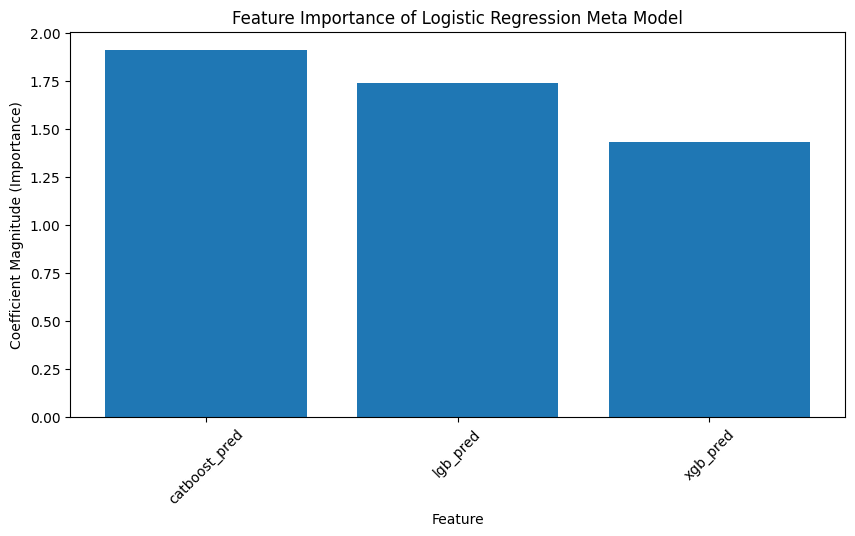

In [14]:
import matplotlib.pyplot as plt
import numpy as np
feature_names=["lgb_pred", "xgb_pred", "catboost_pred"]
# Ensure coef_ is 2D (take absolute values)
importances = np.mean(np.abs(logistic_model.coef_), axis=0)  # Mean across classes

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude (Importance)")
plt.title("Feature Importance of Logistic Regression Meta Model")
plt.show()


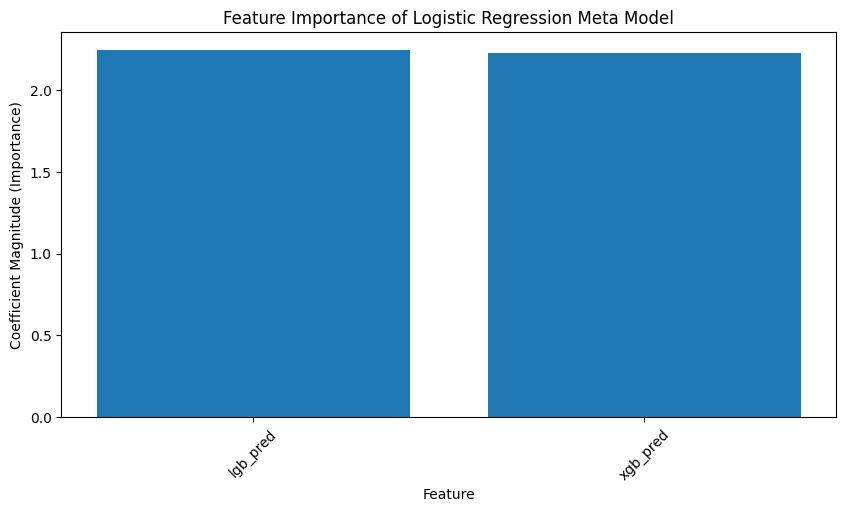

In [15]:
import matplotlib.pyplot as plt
import numpy as np
feature_names=["lgb_pred", "xgb_pred"]
# Ensure coef_ is 2D (take absolute values)
importances = np.mean(np.abs(meta_model.coef_), axis=0)  # Mean across classes

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude (Importance)")
plt.title("Feature Importance of Logistic Regression Meta Model")
plt.show()


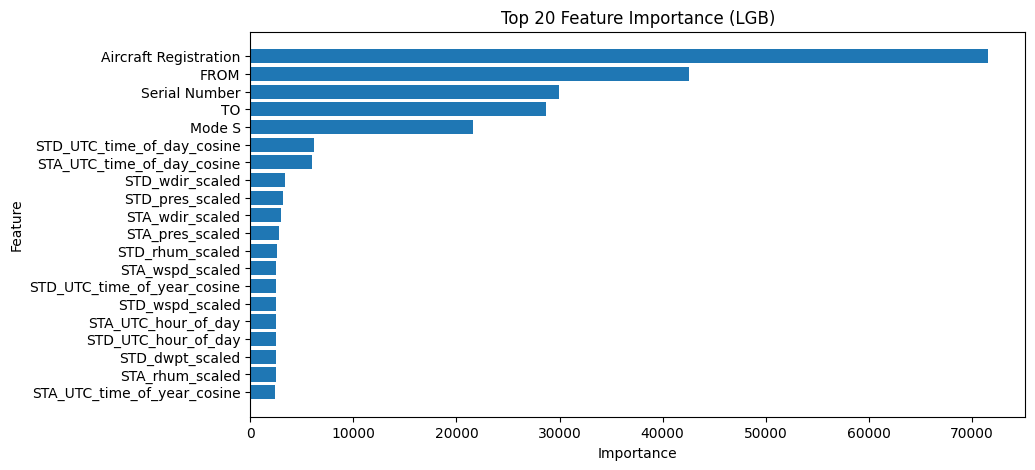

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = lgb_model.feature_importance()
feature_names = X.columns  # Ensure correct feature names

# Sort features by importance (descending order)
indices = np.argsort(importances)[::-1][:20]  # Get top 20

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance (LGB)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


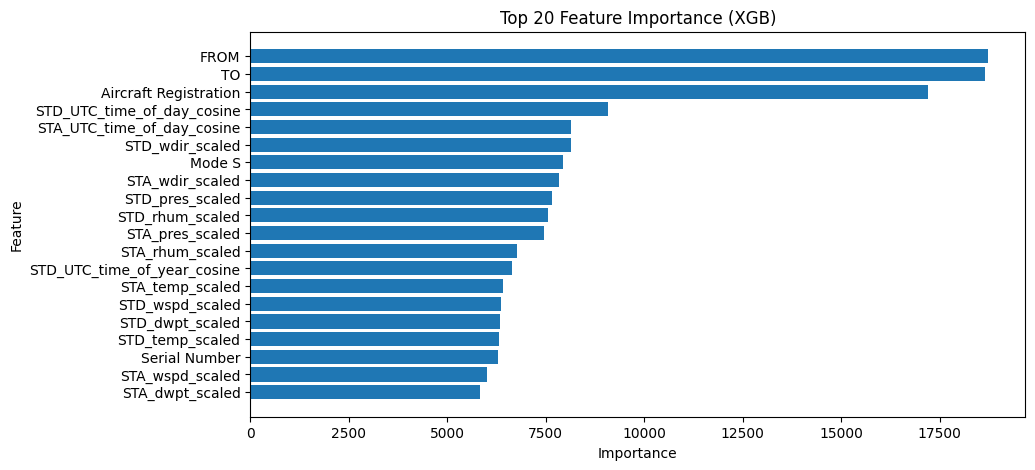

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances_dict = xgb_model.get_score(importance_type="weight")  # Use "gain" or "cover" if needed
feature_names, importances = zip(*importances_dict.items())  # Extract names and values

# Convert to NumPy arrays and sort
importances = np.array(importances, dtype=float)
indices = np.argsort(importances)[::-1][:20]  # Top 20

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance (XGB)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


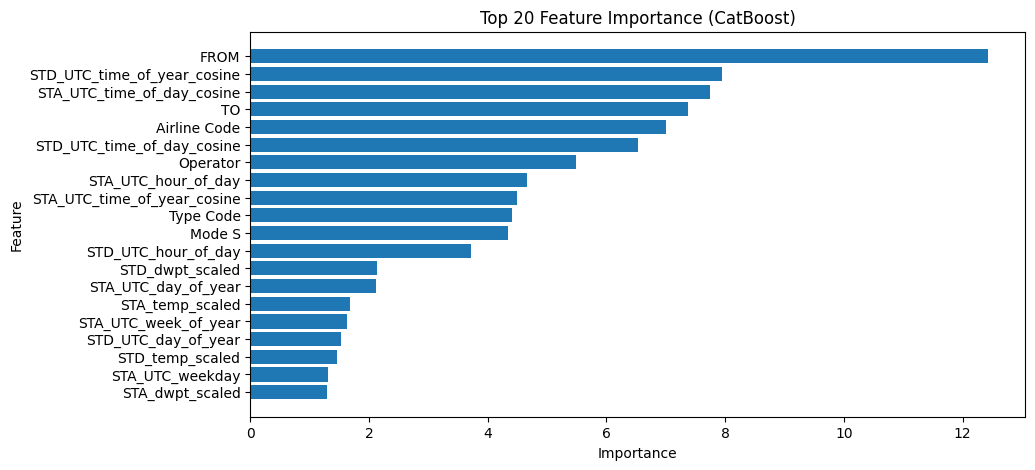

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = catboost_model.get_feature_importance()
feature_names = X.columns  # Ensure correct feature names

# Sort and select top 20
indices = np.argsort(importances)[::-1][:20]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 20 Feature Importance (CatBoost)")
plt.gca().invert_yaxis()
plt.show()


- 

# Normalized Version

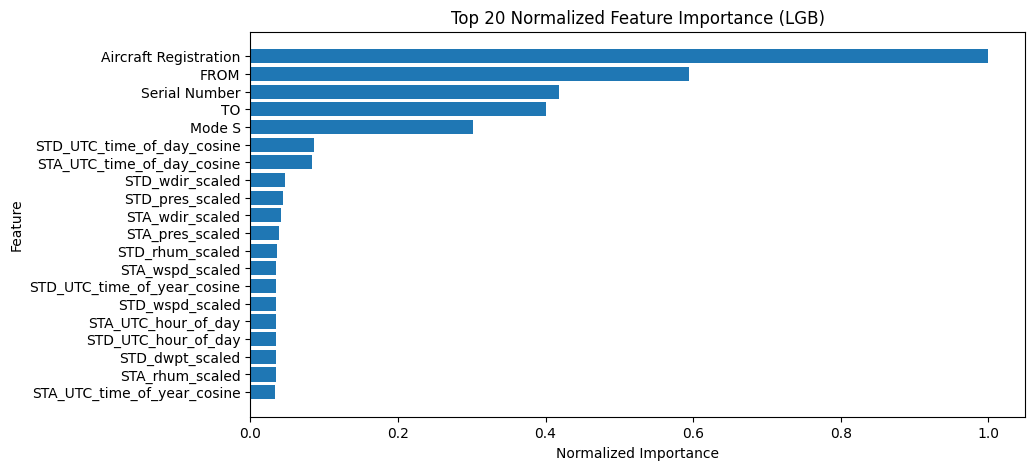

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = lgb_model.feature_importance()
feature_names = X.columns  # Ensure correct feature names

# Normalize importances
importances = importances / np.max(importances)

# Sort features by importance (descending order) and get top 20
indices = np.argsort(importances)[::-1][:20]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.title("Top 20 Normalized Feature Importance (LGB)")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


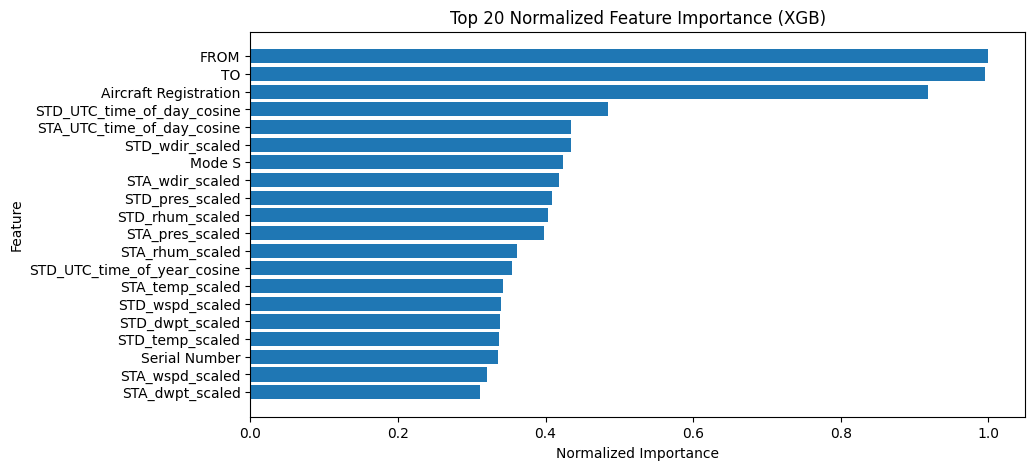

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances_dict = xgb_model.get_score(importance_type="weight")  # Can use "gain" or "cover"
feature_names, importances = zip(*importances_dict.items())  # Extract names and values

# Convert to NumPy arrays and normalize
importances = np.array(importances, dtype=float)
importances = importances / np.max(importances)  # Normalize

# Sort and select top 20
indices = np.argsort(importances)[::-1][:20]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.title("Top 20 Normalized Feature Importance (XGB)")
plt.gca().invert_yaxis()
plt.show()


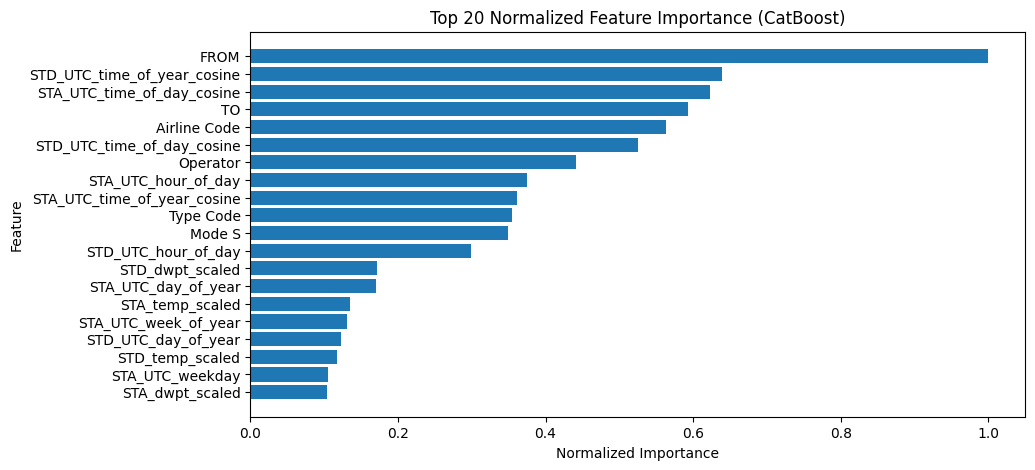

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = catboost_model.get_feature_importance()
feature_names = X.columns  # Ensure correct feature names

# Normalize importances
importances = importances / np.max(importances)

# Sort and select top 20
indices = np.argsort(importances)[::-1][:20]

# Plot
plt.figure(figsize=(10, 5))
plt.barh(np.array(feature_names)[indices], importances[indices], align="center")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.title("Top 20 Normalized Feature Importance (CatBoost)")
plt.gca().invert_yaxis()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1bc7aa3-8640-4158-99bf-4ecfc85b064d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>